In [18]:
from pymongo import MongoClient
import string
import json 
import pickle as pkl
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from collections import Counter
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.porter import PorterStemmer
import re

import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.mpl_style', 'default') # Make the graphs a bit prettier
plt.rcParams['figure.figsize'] = (15, 5)


In [2]:
def get_mongodb_collections( client):
	'''
	create if does not exists; else return handler
	'''
	# Initiate Database all things data science
	db = client['atds']
	# Initiate collection if not existing

	links = db['links']
	#print list(li.find())
	articles = db['articles']
	return links, articles

In [12]:
regex = re.compile('<.+?>|[^a-zA-Z]')
porter = PorterStemmer()
stop_words_lst = stop_words = stopwords.words('english')

def tokenize(text):
    clean_txt = regex.sub(' ', text) #remove any characters that are not english characters.
    clean_txt = clean_txt.lower()
    #  punct_removed = ''.join([letter for letter in word if not letter in PUNCTUATION])???
    stemmed =  [porter.stem(w.strip(string.punctuation)) for w in re.split(' +', clean_txt) \
            if w not in stop_words_lst]
    return [w for w in stemmed if w != '']   

In [13]:
name_article_html = 'raw_html'
name_url = 'url'
name_textcontent = 'textcontent'

mongo_client = MongoClient()
links_collection, articles_collection = get_mongodb_collections(mongo_client)
l = []
query = {name_textcontent:{'$exists': 1},name_article_html:{'$exists':1}}
articles = list(articles_collection.find(query))
for a in articles:
    article_id = a['_id']
    txt = tokenize(a[name_textcontent])
    l.append(len(txt))
    

    


In [14]:
len(articles)

287

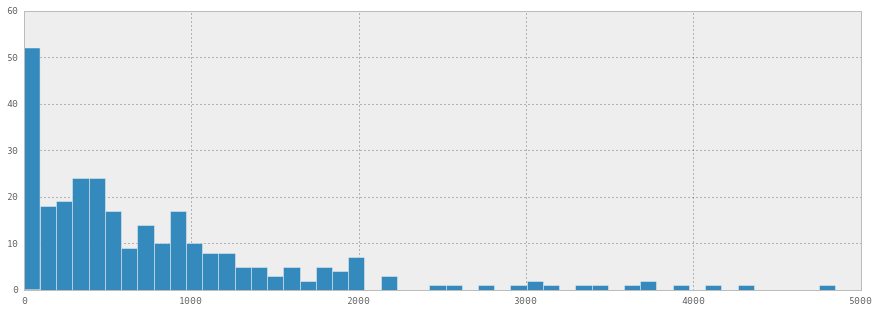

In [20]:
l = np.array(l)
plt.hist(l[l<5000],bins=50)
plt.show()

In [23]:
print 100, len(l[l<100])
print 5000, len(l[l>5000])

100 53
5000 2


2